In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import calendar
import datetime

In [94]:
pd.options.display.max_rows = 999

In [95]:
listfiles = glob.glob("data/*.parquet")
df = pd.concat([pd.read_parquet(l).head(10) for l in listfiles]).reset_index().drop("index", axis=1).sort_values("price")
print("Retrieved flights:", df.shape[0])

Retrieved flights: 57399


### Add information about the dates

In [96]:
df["outbound_Departure_Hour"] = df["outbound_Departure"].apply(lambda x: x[11:])
df["inbound_Departure_Hour"] = df["inbound_Departure"].apply(lambda x: x[11:])
df["outbound_Arrival_Hour"] = df["outbound_Arrival"].apply(lambda x: x[11:])
df["inbound_Arrival_Hour"] = df["inbound_Arrival"].apply(lambda x: x[11:])

df["outbound_Departure_Date"] = df["outbound_Departure"].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
df["inbound_Departure_Date"] = df["inbound_Departure"].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
df["outbound_Arrival_Date"] = df["outbound_Arrival"].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))
df["inbound_Arrival_Date"] = df["inbound_Arrival"].apply(lambda x: datetime.datetime.strptime(x[:10], '%Y-%m-%d'))

df["days"] = df["inbound_Departure_Date"] - df["outbound_Departure_Date"]
df["inbound_Departure_Date_weekday"] = df["inbound_Departure_Date"].apply(lambda x: calendar.day_name[x.weekday()])
df["outbound_Departure_Date_weekday"] = df["outbound_Departure_Date"].apply(lambda x: calendar.day_name[x.weekday()])
df["inbound_Arrival_Date_weekday"] = df["inbound_Arrival_Date"].apply(lambda x: calendar.day_name[x.weekday()])
df["outbound_Arrival_Date_weekday"] = df["outbound_Arrival_Date"].apply(lambda x: calendar.day_name[x.weekday()])


def holiday(_x):
    c = 0
    if (_x["outbound_Arrival_Date"] >= datetime.datetime.strptime("2019-12-25", '%Y-%m-%d')) and (_x["inbound_Departure_Date"] <= datetime.datetime.strptime("2019-12-25", '%Y-%m-%d')):
        c = c + 1
    if (_x["outbound_Arrival_Date"] >= datetime.datetime.strptime("2019-12-26", '%Y-%m-%d')) and (_x["inbound_Departure_Date"] <= datetime.datetime.strptime("2019-12-26", '%Y-%m-%d')):
        c = c + 1
    if (_x["outbound_Arrival_Date"] >= datetime.datetime.strptime("2020-01-01", '%Y-%m-%d')) and (_x["inbound_Departure_Date"] <= datetime.datetime.strptime("2020-01-01", '%Y-%m-%d')):
        c = c + 1

    return c

df["weekdays"] = df.apply(lambda x: np.busday_count(x["outbound_Arrival_Date"].date(),  x["inbound_Departure_Date"].date()) - holiday(x), axis=1)
df["weekdays_to_days_ratio"] = df["weekdays"]/df["days"].apply(lambda x: x/ np.timedelta64(1, 'D'))


In [97]:
df.head(500)

,price,originPlace,destinationPlace,inbound_Departure,inbound_Arrival,inbound_Duration,inbound_Stops,inbound_OperatingCarriers,inbound_NumberStops,outbound_Departure,...,inbound_Departure_Date,outbound_Arrival_Date,inbound_Arrival_Date,days,inbound_Departure_Date_weekday,outbound_Departure_Date_weekday,inbound_Arrival_Date_weekday,outbound_Arrival_Date_weekday,weekdays,weekdays_to_days_ratio
23377,355.49,AMS,HKT,2019-09-29T19:10:00,2019-09-30T09:10:00,1140,"b'[""BKK"", ""VIE""]'","b'[""Bangkok Airways"", ""Austrian Airlines""]'",2,2019-09-19T14:55:00,...,2019-09-29,2019-09-20,2019-09-30,10 days,Sunday,Thursday,Monday,Friday,6,0.600000
1805,355.49,AMS,HKT,2019-09-29T19:10:00,2019-09-30T09:10:00,1140,"b'[""BKK"", ""VIE""]'","b'[""Bangkok Airways"", ""Austrian Airlines""]'",2,2019-09-19T14:55:00,...,2019-09-29,2019-09-20,2019-09-30,10 days,Sunday,Thursday,Monday,Friday,6,0.600000
23840,355.49,AMS,HKT,2019-09-18T20:35:00,2019-09-19T09:10:00,1055,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-05T14:55:00,...,2019-09-18,2019-09-06,2019-09-19,13 days,Wednesday,Thursday,Thursday,Friday,8,0.615385
51456,355.49,AMS,HKT,2019-09-24T20:35:00,2019-09-25T09:10:00,1055,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-11T14:55:00,...,2019-09-24,2019-09-12,2019-09-25,13 days,Tuesday,Wednesday,Wednesday,Thursday,8,0.615385
53911,355.49,AMS,HKT,2019-09-30T19:00:00,2019-10-01T09:10:00,1150,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-19T14:55:00,...,2019-09-30,2019-09-20,2019-10-01,11 days,Monday,Thursday,Tuesday,Friday,6,0.545455
44130,355.49,AMS,HKT,2019-09-18T20:35:00,2019-09-19T09:10:00,1055,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-10T14:55:00,...,2019-09-18,2019-09-11,2019-09-19,8 days,Wednesday,Tuesday,Thursday,Wednesday,5,0.625000
31785,355.49,AMS,HKT,2019-09-09T19:00:00,2019-09-10T09:10:00,1150,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-03T14:55:00,...,2019-09-09,2019-09-04,2019-09-10,6 days,Monday,Tuesday,Tuesday,Wednesday,3,0.500000
26410,355.49,AMS,HKT,2019-09-24T20:35:00,2019-09-25T09:10:00,1055,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-10T14:55:00,...,2019-09-24,2019-09-11,2019-09-25,14 days,Tuesday,Tuesday,Wednesday,Wednesday,9,0.642857
49357,357.21,AMS,HKT,2019-09-25T20:35:00,2019-09-26T09:15:00,1060,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-12T14:55:00,...,2019-09-25,2019-09-13,2019-09-26,13 days,Wednesday,Thursday,Thursday,Friday,8,0.615385
26411,360.60,AMS,HKT,2019-09-24T20:35:00,2019-09-25T09:10:00,1055,"b'[""BKK"", ""VIE""]'","b'[""Thai Airways"", ""Austrian Airlines""]'",2,2019-09-10T11:00:00,...,2019-09-24,2019-09-11,2019-09-25,14 days,Tuesday,Tuesday,Wednesday,Wednesday,9,0.642857


In [98]:
df[
    (df["weekdays"]<= 8) &\
    (df["days"]> np.timedelta64(8, 'D')) &\
    (df["destinationPlace"] == "CEB")
  ]

,price,originPlace,destinationPlace,inbound_Departure,inbound_Arrival,inbound_Duration,inbound_Stops,inbound_OperatingCarriers,inbound_NumberStops,outbound_Departure,...,inbound_Departure_Date,outbound_Arrival_Date,inbound_Arrival_Date,days,inbound_Departure_Date_weekday,outbound_Departure_Date_weekday,inbound_Arrival_Date_weekday,outbound_Arrival_Date_weekday,weekdays,weekdays_to_days_ratio
35331,459.92,AMS,CEB,2019-11-28T12:20:00,2019-11-29T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-19T17:15:00,...,2019-11-28,2019-11-20,2019-11-29,9 days,Thursday,Tuesday,Friday,Wednesday,6,0.666667
35332,462.88,AMS,CEB,2019-11-28T12:20:00,2019-11-29T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-19T11:40:00,...,2019-11-28,2019-11-20,2019-11-29,9 days,Thursday,Tuesday,Friday,Wednesday,6,0.666667
35333,462.88,AMS,CEB,2019-11-28T12:20:00,2019-11-29T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-19T17:15:00,...,2019-11-28,2019-11-20,2019-11-29,9 days,Thursday,Tuesday,Friday,Wednesday,6,0.666667
24924,463.39,AMS,CEB,2019-11-28T12:20:00,2019-11-29T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-18T22:10:00,...,2019-11-28,2019-11-20,2019-11-29,10 days,Thursday,Monday,Friday,Wednesday,6,0.600000
24925,463.39,AMS,CEB,2019-11-28T12:20:00,2019-11-29T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-18T21:10:00,...,2019-11-28,2019-11-20,2019-11-29,10 days,Thursday,Monday,Friday,Wednesday,6,0.600000
53902,472.91,AMS,CEB,2019-12-07T12:20:00,2019-12-08T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-27T16:05:00,...,2019-12-07,2019-11-28,2019-12-08,10 days,Saturday,Wednesday,Sunday,Thursday,7,0.700000
481,472.91,AMS,CEB,2019-12-04T12:20:00,2019-12-05T13:25:00,1925,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-25T22:10:00,...,2019-12-04,2019-11-27,2019-12-05,9 days,Wednesday,Monday,Thursday,Wednesday,5,0.555556
3030,472.91,AMS,CEB,2019-12-03T12:20:00,2019-12-04T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-20T16:05:00,...,2019-12-03,2019-11-21,2019-12-04,13 days,Tuesday,Wednesday,Wednesday,Thursday,8,0.615385
3031,472.91,AMS,CEB,2019-12-03T12:20:00,2019-12-04T09:15:00,1675,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-20T16:05:00,...,2019-12-03,2019-11-21,2019-12-04,13 days,Tuesday,Wednesday,Wednesday,Thursday,8,0.615385
482,472.91,AMS,CEB,2019-12-04T12:20:00,2019-12-05T13:25:00,1925,"b'[""HKG"", ""LHR""]'","b'[""Cathay Pacific"", ""British Airways""]'",2,2019-11-25T22:10:00,...,2019-12-04,2019-11-27,2019-12-05,9 days,Wednesday,Monday,Thursday,Wednesday,5,0.555556


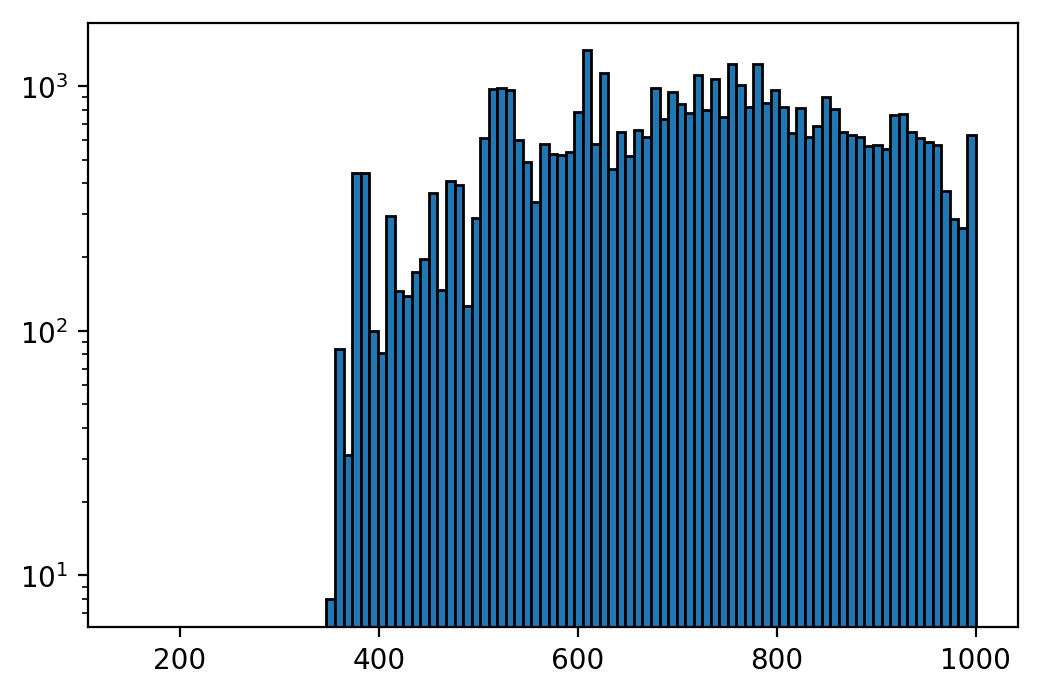

In [99]:
plt.figure(dpi=200)
plt.yscale('log', nonposy='clip')
plt.hist(df["price"].values, bins=np.linspace(150,1000,100), edgecolor="black")
plt.show()